In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\lucas.carillo\Downloads\Iris.csv')

In [40]:
#Primeiras 5 linhas do dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#últimas 5 linhas do dataframe
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#fornece informações sobre o DataFrame, incluindo o número de linhas e colunas,
#o nome de cada coluna e o tipo de dados em cada coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#calcula várias estatísticas descritivas para cada coluna, incluindo a contagem de valores não nulos, 
#a média, o desvio padrão, o valor mínimo,
#o primeiro quartil, a mediana, o terceiro quartil e o valor máximo.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
#retorna o número de ocorrências únicas em uma coluna.

df = df["Species"].value_counts()
display(df)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [17]:
#retorna uma matriz booleana indicando quais valores são nulos (NaN) no DataFrame.
df.isnull()

Iris-setosa        False
Iris-versicolor    False
Iris-virginica     False
Name: Species, dtype: bool

In [42]:
df.columns = ["Id","Comprimento Sépala", "Largura Sépala", "Comprimento Pétala", "Largura Pétala", "Tipo"]
df = df.drop("Id", axis=1)



In [43]:
#é usada para calcular a matriz de correlação entre as colunas de um DataFrame. Essa matriz fornece informações sobre o grau de relação linear entre as diferentes variáveis do conjunto de dados. Os valores de correlação variam de -1 a 1, onde:

#Uma correlação de 1 indica uma relação positiva perfeita, ou seja, quando uma variável aumenta, a outra também aumenta na mesma proporção.
#Uma correlação de -1 indica uma relação negativa perfeita, ou seja, quando uma variável aumenta, a outra diminui na mesma proporção.
#Uma correlação de 0 indica que não há relação linear entre as duas variáveis.
#Os valores de correlação entre -1 e 1 indicam o grau de relação linear entre as duas variáveis, sendo que quanto mais próximo de 1 ou -1, maior é a intensidade da relação.

df.corr()

C:\Users\lucas.carillo\AppData\Local\Temp\ipykernel_11864\1630743409.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Comprimento Sépala,Largura Sépala,Comprimento Pétala,Largura Pétala
Comprimento Sépala,1.000000,-0.109369,0.871754,0.817954
Largura Sépala,-0.109369,1.000000,-0.420516,-0.356544
Comprimento Pétala,0.871754,-0.420516,1.000000,0.962757
Largura Pétala,0.817954,-0.356544,0.962757,1.000000


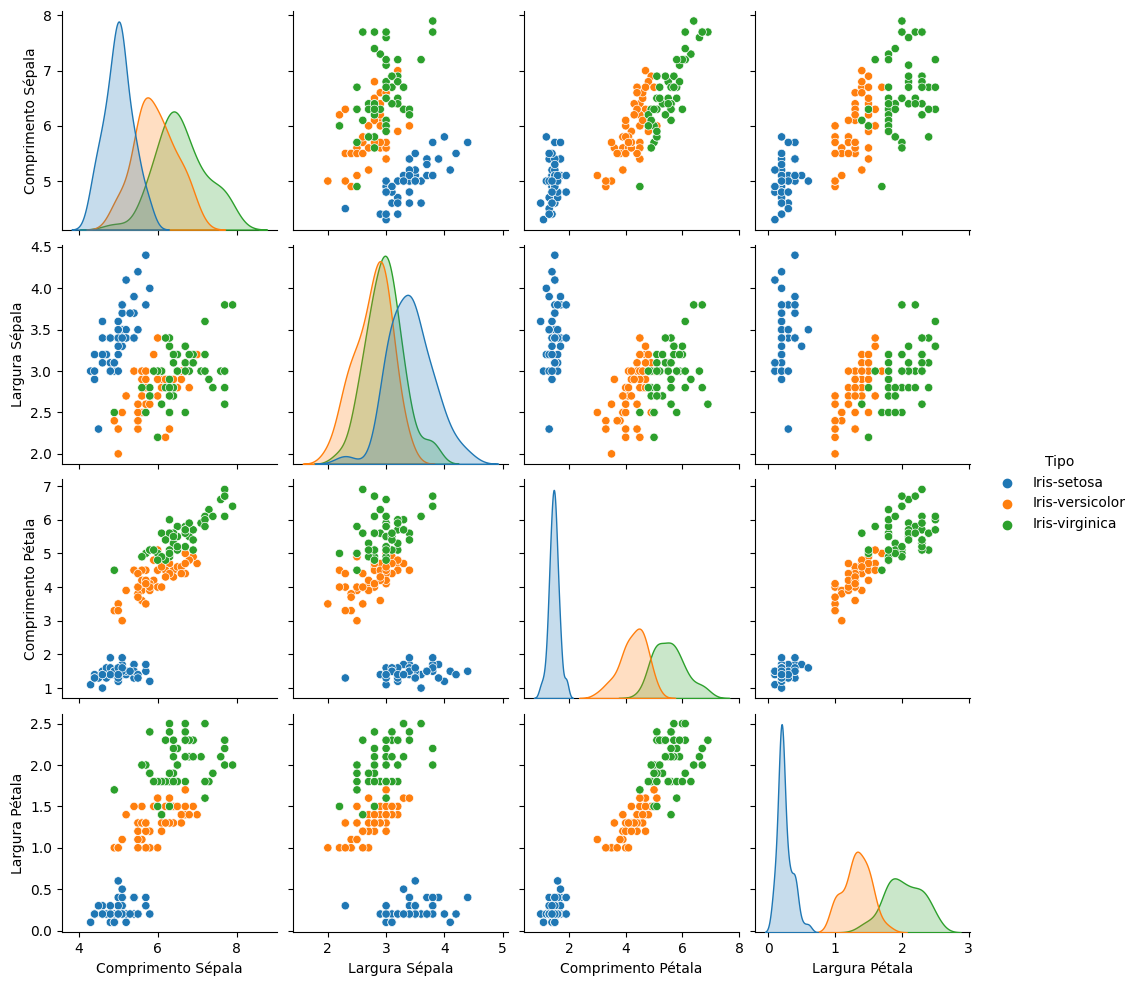

In [46]:
import seaborn as sns

sns.pairplot(df, hue="Tipo")


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Separando as variáveis preditoras e alvo
X = df.drop('Species', axis=1)
y = df['Species']

# Dividindo a base em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando as variáveis preditoras
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliando a performance do modelo no conjunto de teste
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


Acurácia do modelo: 1.00
